# Wrangle and Analyze Twitter Data - WeRateDogs

## Introduction

In this Udacity project, the dataset is the tweet archive of the Twitter account, @dog_rates, also known as WeRateDogs. This account rates people's dogs with a funny comment about the dog.

The archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column it does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." The archive was filtered to only include tweets with ratings (2,356 total).

Udacity also provided an image predictions file that classifies dog breeds. Runing this file results in a table of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

In addition to the archive and image predictions file, more data can be found via the Twitter API, Tweepy.

## Goal

Provide analysis and visualization of WeRateDogs twitter data by applying the data wrangling process (gathering, assessing, cleaning). The Twitter archive is great but only contains basic tweet information. Wrangling the data is necessary to create compelling findings and visuals.

## Key Points:

• We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

• Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 quality issues in this dataset.

• Cleaning includes merging individual pieces of data according to the rules of tidy data.

• The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

• We do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Import Libraries

In [739]:
import pandas as pd
import numpy as np
import datetime
import tweepy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

## Gather

### WeRateDogs Twitter Archive

In [740]:
#Read the twitter archive file 
#Contains tweets with additional info parsed from text
#Set as dataframe called 
archive = pd.read_csv("twitter-archive-enhanced.csv")

In [741]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [742]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### Image Predictions File

In [743]:
#Request
url  = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [744]:
#Response
#print("Header:", response.headers['content-type'])
#print("\nText:\n", response.text)

In [745]:
#Download tsv tile
with open('image_predictions.csv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.csv', sep='\t')

In [746]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### JSON Data

In [747]:
consumer_key =  "DU7RykGiv6gMie08yGhZsDX4M"
consumer_secret = "XkR7nF6DU5kHAq1Yl0cyBegHDQHZHuGx873qI0TptOo6fdOhwg"
access_token =  "987767184989540354-Wl1eWUuIUjFEZf2Mk9agQoCs8Z3vakO"
access_secret = "ali870fZiQvNlHbIWCfl84nYZmACG86K9alKgJTL3woEY"

In [748]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [749]:
#ids = archive['tweet_id']
#ids.head()

In [750]:
import time
ltime = time.localtime()
def printTime():
    print(time.strftime("%I:%M:%S", time.localtime()))
printTime()

11:14:58


In [832]:
# Commented out because the file has run
#with open('tweet_json.txt','w') as file:
#    for idx, tweet_id in enumerate(archive.tweet_id):
#        try:
#            #print every 100
#            if ((idx + 1) % 100 == 0):
#                print("tweets loaded: ", idx + 1)

#            tweet = api.get_status(tweet_id, wait_on_rate_limit=True, 
#                                  wait_on_rate_limit_notify=True)
#            json.dump(tweet._json, file)
#            file.write('\n')
#        except Exception as e:
#            print("index:", idx, "tweet id:", tweet_id, str(e))
#            if isinstance(e, tweepy.RateLimitError):
#                printTime()

In [752]:
elements_to_save = ['id', 'favorite_count', 'retweet_count']
tweet_list = []
with open('tweet_json.txt', "r") as json_file:
    for each in json_file:
        try:
            tweet = json.loads(each)
            tweet_list.append(tweet)
        except Exception as e:
            print(str(e))

In [753]:
tweet_json = pd.DataFrame()

In [754]:
# tweet_json = pd.read_json('tweet_json.txt', lines=True, orient='records')       

In [755]:
tweet_json['id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))

In [756]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8591,38815
1,892177421306343426,6312,33249
2,891815181378084864,4191,25044
3,891689557279858688,8711,42191
4,891327558926688256,9475,40342


In [757]:
tweet_json.tail()

,id,retweet_count,favorite_count
2339,666049248165822465,40,109
2340,666044226329800704,141,299
2341,666033412701032449,44,125
2342,666029285002620928,47,130
2343,666020888022790149,518,2558


## Assess

### Twitter Archive

In [758]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [759]:
sum(archive.duplicated())

0

In [760]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [761]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1403,699413908797464576,NaN,NaN,2016-02-16 02:04:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
1349,704134088924532736,NaN,NaN,2016-02-29 02:40:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This sneezy pupper is just adorable af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/igW2OEwu9vg,12,10,None,None,None,pupper,None
418,822462944365645825,NaN,NaN,2017-01-20 15:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822462944...,14,10,Gabe,None,None,pupper,None
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None
1620,684940049151070208,NaN,NaN,2016-01-07 03:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oreo. She's a photographer and a model...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684940049...,12,10,Oreo,None,None,None,None
1273,709207347839836162,NaN,NaN,2016-03-14 02:39:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709207347...,11,10,Penny,None,None,None,None
1115,732726085725589504,NaN,NaN,2016-05-18 00:14:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aldrick. He looks wise af. Also except...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732726085...,11,10,Aldrick,None,None,None,None


In [762]:

sum(archive.expanded_urls.isnull()) 

59

In [763]:
archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
Daisy            7
Buddy            7
an               7
Bailey           7
Toby             7
Milo             6
Dave             6
Oscar            6
Jax              6
Jack             6
Koda             6
Rusty            6
Scout            6
Bella            6
Leo              6
Stanley          6
Larry            5
              ... 
Ralphson         1
Kevon            1
Tebow            1
Finnegus         1
Nida             1
Shakespeare      1
Charl            1
Arnold           1
Hamrick          1
Crawford         1
Grey             1
Sojourner        1
Gabby            1
Pancake          1
Poppy            1
Harry            1
Ricky            1
Batdog           1
Petrick          1
Chesney          1
Zeus             1
Dotsy       

### Image Predictions File

In [764]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [765]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1898,850753642995093505,https://pbs.twimg.com/media/C8576jrW0AEYWFy.jpg,1,pug,0.996952,True,bull_mastiff,0.000996,True,French_bulldog,0.000883,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
347,672475084225949696,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg,1,terrapin,0.879286,False,cockroach,0.045252,False,box_turtle,0.016404,False
1512,786363235746385920,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1,golden_retriever,0.929266,True,Labrador_retriever,0.062867,True,Saluki,0.002157,True
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True


### JSON Data

In [766]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
id                2344 non-null int64
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [767]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8591,38815
1,892177421306343426,6312,33249
2,891815181378084864,4191,25044
3,891689557279858688,8711,42191
4,891327558926688256,9475,40342


### Quality Issues

• tweet_id is an integer, should be a string

• timestamp is an object, should be a timestamp

• Retweet columns present, need to be removed

• Reply columns (in_reply_to_status_idin_reply_to_user_id) have Null values

• Source column not necessary

• Missing tweet images (expanded URLs)

• Under the name column, invalid dog names ("None", "a" and "an") should be converted to "NaN" for consistency.

• Dog stages (doggo, floofer, pupper, puppo) have "None" as the value

### Tidiness Issues

• tweet_json has column 'id'

• dog stages have 4 columns

• merge all 3 dataframes


## Clean

In [768]:
# Make copy of dataframes to clean them 
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Twitter Archive

### Define

Convert tweet_id from integer to string

### Code

In [769]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

### Test

In [770]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Define

Convert 'timestamp' from object to timestamp

### Code

In [771]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

### Test

In [772]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Define

Remove retweet columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

### Code

In [773]:
archive_clean.drop(['retweeted_status_id'], axis=1, inplace=True)
archive_clean.drop(['retweeted_status_user_id'], axis=1, inplace=True)                   
archive_clean.drop(['retweeted_status_timestamp'], axis=1, inplace=True)
                 

### Test

In [774]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 257.8+ KB


### Define

Remove reply columns (in_reply_to_status_id, in_reply_to_user_id) and source column

### Code

In [775]:
archive_clean.drop(['in_reply_to_status_id'], axis=1, inplace=True)
archive_clean.drop(['in_reply_to_user_id'], axis=1, inplace=True)
archive_clean.drop(['source'], axis=1, inplace=True)

### Test

In [776]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

Remove rows with missing tweet images (expanded URLs)

### Code

In [777]:
archive_clean.dropna(subset=['expanded_urls'], inplace=True)

### Test

In [778]:
sum(archive_clean.expanded_urls.isnull())

0

### Define

Under "name" column, convert "None", "a" and "an" to NaN

### Code

In [779]:
archive_clean.replace(to_replace="None", value="NaN", inplace=True)
archive_clean.replace(to_replace="a", value="NaN", inplace=True)
archive_clean.replace(to_replace="an", value="NaN", inplace=True)
#archive_clean['name'].replace('None', np.nan, inplace=True)

### Test

In [780]:
sum(archive_clean['name']=='None')

0

In [781]:
sum(archive_clean['name']=='a')

0

In [782]:
sum(archive_clean['name']=='an')

0

### Image Predictions

### Define

Convert tweet_id from integer to string

### Code

In [783]:
image_predictions_clean.tweet_id = image_predictions.tweet_id.astype(str)

### Test

In [784]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### JSON

### Define

Rename id column of tweet_json to tweet_id 

### Code

In [785]:
tweet_json_clean = tweet_json_clean.rename(columns = {'id':'tweet_id'})


### Test

In [786]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8591,38815
1,892177421306343426,6312,33249
2,891815181378084864,4191,25044
3,891689557279858688,8711,42191
4,891327558926688256,9475,40342


### Define

Convert tweet_id from integer ot string

### Code

In [787]:
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

### Test

In [801]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
tweet_id          2344 non-null object
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


### Define

Join archive_clean, image_predictions_clean and tweet_json

### Code

In [788]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
tweet_id          2344 non-null object
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [789]:
archive_clean_final = tweet_json_clean.merge(archive_clean, on=['tweet_id'])
archive_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 13 columns):
tweet_id              2285 non-null object
retweet_count         2285 non-null int64
favorite_count        2285 non-null int64
timestamp             2285 non-null datetime64[ns]
text                  2285 non-null object
expanded_urls         2285 non-null object
rating_numerator      2285 non-null int64
rating_denominator    2285 non-null int64
name                  2285 non-null object
doggo                 2285 non-null object
floofer               2285 non-null object
pupper                2285 non-null object
puppo                 2285 non-null object
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 249.9+ KB


In [790]:
archive_clean_final = archive_clean.merge(image_predictions_clean, on = ['tweet_id'])
archive_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non

In [791]:
archive_clean_final = archive_clean_final.merge(tweet_json_clean,on=['tweet_id'])
archive_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 24 columns):
tweet_id              2068 non-null object
timestamp             2068 non-null datetime64[ns]
text                  2068 non-null object
expanded_urls         2068 non-null object
rating_numerator      2068 non-null int64
rating_denominator    2068 non-null int64
name                  2068 non-null object
doggo                 2068 non-null object
floofer               2068 non-null object
pupper                2068 non-null object
puppo                 2068 non-null object
jpg_url               2068 non-null object
img_num               2068 non-null int64
p1                    2068 non-null object
p1_conf               2068 non-null float64
p1_dog                2068 non-null bool
p2                    2068 non-null object
p2_conf               2068 non-null float64
p2_dog                2068 non-null bool
p3                    2068 non-null object
p3_conf               2068 non

### Test

In [792]:
archive_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 24 columns):
tweet_id              2068 non-null object
timestamp             2068 non-null datetime64[ns]
text                  2068 non-null object
expanded_urls         2068 non-null object
rating_numerator      2068 non-null int64
rating_denominator    2068 non-null int64
name                  2068 non-null object
doggo                 2068 non-null object
floofer               2068 non-null object
pupper                2068 non-null object
puppo                 2068 non-null object
jpg_url               2068 non-null object
img_num               2068 non-null int64
p1                    2068 non-null object
p1_conf               2068 non-null float64
p1_dog                2068 non-null bool
p2                    2068 non-null object
p2_conf               2068 non-null float64
p2_dog                2068 non-null bool
p3                    2068 non-null object
p3_conf               2068 non

### Define

Merge 4 dog stages into one stage column 
Remove the 4 unnecessary columns

### Code

In [793]:
archive_clean_final['dog_stage'] = archive_clean_final['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [794]:
archive_clean_final = archive_clean_final.drop(['puppo','pupper','floofer','doggo'],axis = 1)

### Test

In [795]:
archive_clean_final.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1760,671533943490011136,2015-12-01 03:39:03,Super rare dog here. Spiffy mohawk. Sharp mout...,https://twitter.com/dog_rates/status/671533943...,6,10,NaN,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,...,False,cock,0.442033,False,black_swan,0.001181,False,610,1069,NaN
430,807010152071229440,2016-12-08 23:53:08,This is Lennon. He's a Boopershnoop Pupperdoop...,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg,1,golden_retriever,...,True,Irish_setter,0.213642,True,Welsh_springer_spaniel,0.031887,True,4298,14224,NaN
1188,698635131305795584,2016-02-13 22:29:29,Here we are witnessing five Guatemalan Birch F...,https://twitter.com/dog_rates/status/698635131...,12,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/69863...,1,Samoyed,...,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True,374,1376,NaN
879,739606147276148736,2016-06-05 23:53:41,Meet Benji. He just turned 1. Has already give...,https://twitter.com/dog_rates/status/739606147...,9,10,Benji,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,...,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True,1817,5768,pupper
1480,679062614270468097,2015-12-21 22:15:18,This is Chompsky. He lives up to his name. 11/...,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,...,False,schipperke,0.045519,True,German_shepherd,0.023353,True,9031,18265,NaN
486,796759840936919040,2016-11-10 17:02:03,Say hello to Romeo. He was just told that it's...,https://twitter.com/dog_rates/status/796759840...,11,10,Romeo,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,...,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True,3456,12985,NaN
1719,672481316919734272,2015-12-03 18:23:34,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,...,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True,128,739,pupper
148,857029823797047296,2017-04-26 00:33:27,This is Zeke. He performs group cheeky wink tu...,https://twitter.com/dog_rates/status/857029823...,12,10,Zeke,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,...,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True,4218,19522,NaN
1471,679527802031484928,2015-12-23 05:03:47,This little pupper just arrived. 11/10 would s...,https://twitter.com/dog_rates/status/679527802...,11,10,NaN,https://pbs.twimg.com/media/CW4q7jDWkAA2y8g.jpg,1,mailbox,...,False,cannon,0.158936,False,cuirass,0.052647,False,801,2831,pupper
403,812709060537683968,2016-12-24 17:18:34,This is Brandi and Harley. They are practicing...,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,Irish_setter,...,True,golden_retriever,0.182610,True,Leonberg,0.156912,True,1609,7219,NaN


### Define

### Code

## Store

In [821]:
#Store clean dataframe to CSV file
archive_clean_final.to_csv('twitter_archive_master.csv')

In [830]:
archive_clean_final = pd.read_csv('twitter_archive_master.csv')
archive_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 22 columns):
Unnamed: 0            2068 non-null int64
tweet_id              2068 non-null int64
timestamp             2068 non-null object
text                  2068 non-null object
expanded_urls         2068 non-null object
rating_numerator      2068 non-null int64
rating_denominator    2068 non-null int64
name                  1432 non-null object
jpg_url               2068 non-null object
img_num               2068 non-null int64
p1                    2068 non-null object
p1_conf               2068 non-null float64
p1_dog                2068 non-null bool
p2                    2068 non-null object
p2_conf               2068 non-null float64
p2_dog                2068 non-null bool
p3                    2068 non-null object
p3_conf               2068 non-null float64
p3_dog                2068 non-null bool
retweet_count         2068 non-null int64
favorite_count        2068 non-null int64


## Insights

### Most Popular Weekday for Tweets

In [828]:
archive_clean_final['timestamp'] = pd.to_datetime(archive_clean_final['timestamp'])
archive_clean_final['day_of_week'] = archive_clean_final['timestamp'].dt.weekday_name

In [829]:
archive_clean_final['day_of_week'].value_counts()

Monday       339
Wednesday    313
Tuesday      310
Friday       294
Thursday     290
Sunday       261
Saturday     261
Name: day_of_week, dtype: int64

Monday received the most tweets. There is a steady decline of tweets as the week progresses.

### Top Tweet by Favorite Count

In [833]:
archive_clean_final.nlargest(1,'favorite_count')

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
325,325,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,49140,143436,puppo


The top tweet is tweet_id #822872901745569793 with a favorite count of 143436.

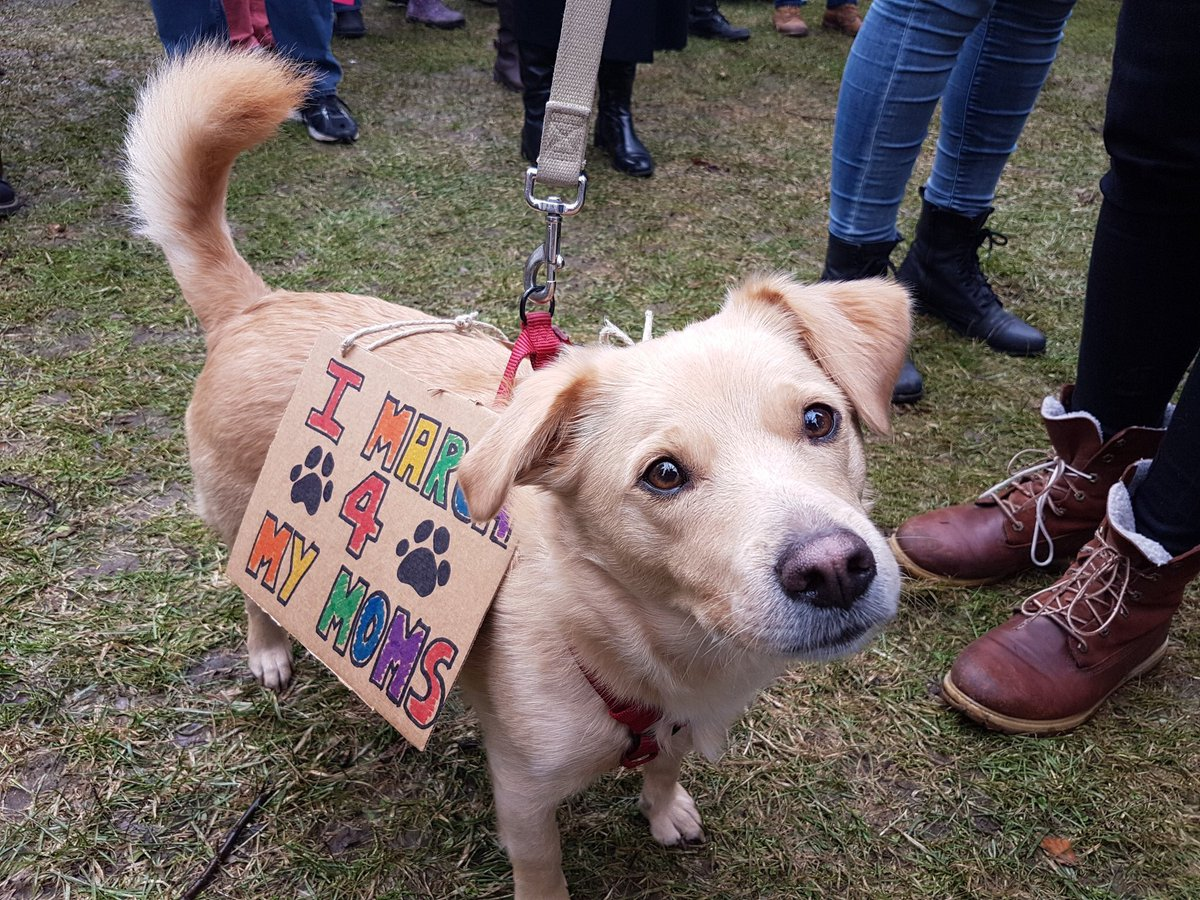

### Highest Rated Dog

In [836]:
archive_clean_final.nlargest(1,'rating_numerator')

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
798,798,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2710,5513,NaN


The highest rated dog is Atticus.

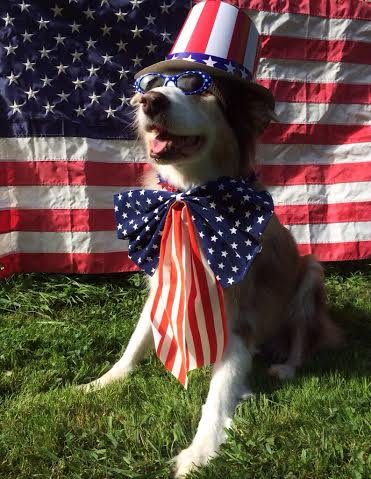

### Correlation Between Favorites and Retweets

Text(0.5,1,'Favorites vs. Retweets')

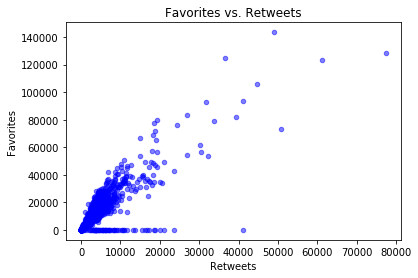

In [844]:
archive_clean_final.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5, color = 'blue')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Favorites vs. Retweets')

The scatterplot above shows a positive correlation between favorites and retweets. As favorite count increases so does retweet count.